## Importing Libraries & Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
(X_train, y_train),(X_test, y_test) = mnist.load_data()

In [3]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

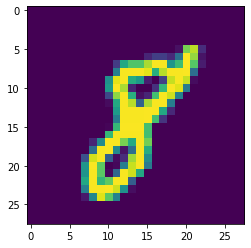

In [4]:
plt.imshow(X_train[17])

In [5]:
X_train = X_train/255
X_test = X_test/255

## Building Convolutional Autoencoder

In [6]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Reshape, GaussianNoise
from keras.optimizers import SGD

In [9]:
encoder = Sequential()

In [10]:
encoder.add(Flatten(input_shape=[28,28]))
encoder.add(GaussianNoise(0.2))
encoder.add(Dense(units=400, activation='relu'))
encoder.add(Dense(units=200, activation='relu'))
encoder.add(Dense(units=100, activation='relu'))
encoder.add(Dense(units=50, activation='relu'))
encoder.add(Dense(units=25, activation='relu'))
encoder.add(Dense(units=10, activation='relu'))

In [11]:
decoder = Sequential()

In [12]:
decoder.add(Dense(25, activation='relu', input_shape=[10]))
decoder.add(Dense(50, activation='relu'))
decoder.add(Dense(100, activation='relu'))
decoder.add(Dense(200, activation='relu'))
decoder.add(Dense(400, activation='relu'))
decoder.add(Dense(784, activation='sigmoid'))
decoder.add(Reshape([28,28]))

In [13]:
autoencoder = Sequential([encoder, decoder])

In [14]:
autoencoder.compile(loss='binary_crossentropy', optimizer=SGD(learning_rate=1.5))

In [15]:
autoencoder.fit(X_train, X_train, epochs=10, validation_data=[X_train, X_train])

Train on 60000 samples, validate on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 63s 1ms/step - loss: 0.2586 - val_loss: 0.2325
Epoch 2/10
60000/60000 [==============================] - 68s 1ms/step - loss: 0.2195 - val_loss: 0.2035
Epoch 3/10
60000/60000 [==============================] - 72s 1ms/step - loss: 0.1904 - val_loss: 0.1752ETA: 1 - ETA: 0s
Epoch 4/10
60000/60000 [==============================] - 74s 1ms/step - loss: 0.1708 - val_loss: 0.1637
Epoch 5/10
60000/60000 [==============================] - 73s 1ms/step - loss: 0.1616 - val_loss: 0.1543
Epoch 6/10
60000/60000 [==============================] - 79s 1ms/step - loss: 0.1555 - val_loss: 0.1511
Epoch 7/10
60000/60000 [==============================] - 65s 1ms/step - loss: 0.1513 - val_loss: 0.1496
Epoch 8/10
60000/60000 [==============================] - 58s 965us/step - loss: 0.1478 - val_loss: 0.1427
Epoch 9/10
60000/60000 [==============================] - 64s 1ms/step - loss: 0.1446 - val_

In [16]:
y_pred = autoencoder.predict(X_test)

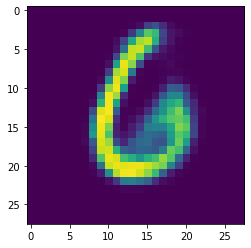

In [25]:
plt.imshow(y_pred[n])

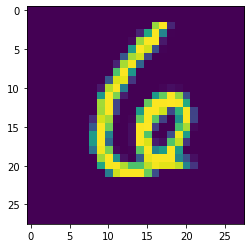

In [24]:
plt.imshow(X_test[n])